# Data preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from joblib import dump

In [2]:
df = pd.read_csv('SavedData.csv')
print(df.columns)
df

Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'remaining_lease', 'lease_commence_date',
       'storey_range', '_id', 'block'],
      dtype='object')


,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block
0,SERANGOON,EXECUTIVE,Maisonette,152.0,SERANGOON NTH AVE 4,720000.0,2017-02,74 years 09 months,1992,04 TO 06,1,526
1,SERANGOON,EXECUTIVE,Maisonette,152.0,SERANGOON NTH AVE 4,725000.0,2017-02,74 years 09 months,1992,10 TO 12,2,525
2,SERANGOON,EXECUTIVE,Maisonette,154.0,SERANGOON CTRL,938888.0,2017-02,70 years 11 months,1989,10 TO 12,3,423
3,TAMPINES,3 ROOM,Simplified,64.0,TAMPINES ST 83,290000.0,2017-02,69 years 09 months,1987,01 TO 03,4,849
4,TAMPINES,3 ROOM,Simplified,64.0,TAMPINES ST 44,292000.0,2017-02,69 years 05 months,1987,10 TO 12,5,462
...,...,...,...,...,...,...,...,...,...,...,...,...
130092,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN ST 22,715000.0,2022-07,62 years 02 months,1985,01 TO 03,130093,277
130093,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN ST 61,740000.0,2022-07,63 years 10 months,1987,04 TO 06,130094,614
130094,YISHUN,EXECUTIVE,Apartment,145.0,YISHUN ST 71,720000.0,2022-07,62 years 11 months,1986,07 TO 09,130095,723
130095,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN ST 71,678000.0,2022-07,63 years 01 month,1986,04 TO 06,130096,724


In [3]:
df.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block
0,SERANGOON,EXECUTIVE,Maisonette,152.0,SERANGOON NTH AVE 4,720000.0,2017-02,74 years 09 months,1992,04 TO 06,1,526
1,SERANGOON,EXECUTIVE,Maisonette,152.0,SERANGOON NTH AVE 4,725000.0,2017-02,74 years 09 months,1992,10 TO 12,2,525
2,SERANGOON,EXECUTIVE,Maisonette,154.0,SERANGOON CTRL,938888.0,2017-02,70 years 11 months,1989,10 TO 12,3,423
3,TAMPINES,3 ROOM,Simplified,64.0,TAMPINES ST 83,290000.0,2017-02,69 years 09 months,1987,01 TO 03,4,849
4,TAMPINES,3 ROOM,Simplified,64.0,TAMPINES ST 44,292000.0,2017-02,69 years 05 months,1987,10 TO 12,5,462


In [4]:
df.isna().sum()

town                   0
flat_type              0
flat_model             0
floor_area_sqm         0
street_name            0
resale_price           0
month                  0
remaining_lease        0
lease_commence_date    0
storey_range           0
_id                    0
block                  0
dtype: int64

In [5]:
df.drop(['_id'], axis=1, inplace=True)

In [6]:
# temporarily drop streetname, lease, block
df.drop(['street_name', 'remaining_lease', 'block'], axis=1, inplace=True)

In [7]:
# check for any typos in values
print("Total of {0} towns with values {1}\n".format(df.town.nunique(), df.town.unique()))
print("Total of {0} types of flats with values {1}\n".format(df.flat_type.nunique(),df.flat_type.unique()))
print("Total of {0} models of flats with values {1}\n".format(df.flat_model.nunique(),df.flat_model.unique()))
print(df.storey_range.unique())

Total of 26 towns with values ['SERANGOON' 'TAMPINES' 'YISHUN' 'BEDOK' 'TOA PAYOH' 'WOODLANDS'
 'ANG MO KIO' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'HOUGANG' 'PUNGGOL' 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG'
 'CLEMENTI' 'GEYLANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA'
 'MARINE PARADE' 'PASIR RIS' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG']

Total of 7 types of flats with values ['EXECUTIVE' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' '1 ROOM'
 'MULTI-GENERATION']

Total of 21 models of flats with values ['Maisonette' 'Simplified' 'Model A' 'New Generation' 'DBSS' 'Improved'
 'Premium Apartment' 'Apartment' 'Standard' 'Model A2'
 'Model A-Maisonette' 'Type S1' 'Type S2' 'Adjoined flat' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'
 'Premium Apartment Loft' '2-room' '3Gen']

['04 TO 06' '10 TO 12' '01 TO 03' '07 TO 09' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '37 TO 39'
 '49 TO 51' '46 TO 48' '40 TO 42' '34 TO 36

In [8]:
# rough exploration with clustering: use town, flat type, model, commencement date, storey range.
# town: label encoding (too many features if one-hot)
# flat type: label encoding
# flat model: label encoding
# storey range: label encoding (too many features)
# month: label encoding. 2017-02 is encoded as 0

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['town_cat'] = le.fit_transform(df['town'])

mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

{'ANG MO KIO': 0, 'BEDOK': 1, 'BISHAN': 2, 'BUKIT BATOK': 3, 'BUKIT MERAH': 4, 'BUKIT PANJANG': 5, 'BUKIT TIMAH': 6, 'CENTRAL AREA': 7, 'CHOA CHU KANG': 8, 'CLEMENTI': 9, 'GEYLANG': 10, 'HOUGANG': 11, 'JURONG EAST': 12, 'JURONG WEST': 13, 'KALLANG/WHAMPOA': 14, 'MARINE PARADE': 15, 'PASIR RIS': 16, 'PUNGGOL': 17, 'QUEENSTOWN': 18, 'SEMBAWANG': 19, 'SENGKANG': 20, 'SERANGOON': 21, 'TAMPINES': 22, 'TOA PAYOH': 23, 'WOODLANDS': 24, 'YISHUN': 25}


In [10]:
df['flat_model_cat'] = le.fit_transform(df['flat_model'])

mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

{'2-room': 0, '3Gen': 1, 'Adjoined flat': 2, 'Apartment': 3, 'DBSS': 4, 'Improved': 5, 'Improved-Maisonette': 6, 'Maisonette': 7, 'Model A': 8, 'Model A-Maisonette': 9, 'Model A2': 10, 'Multi Generation': 11, 'New Generation': 12, 'Premium Apartment': 13, 'Premium Apartment Loft': 14, 'Premium Maisonette': 15, 'Simplified': 16, 'Standard': 17, 'Terrace': 18, 'Type S1': 19, 'Type S2': 20}


In [11]:
df['storey_range_cat'] = le.fit_transform(df['storey_range'])

mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

{'01 TO 03': 0, '04 TO 06': 1, '07 TO 09': 2, '10 TO 12': 3, '13 TO 15': 4, '16 TO 18': 5, '19 TO 21': 6, '22 TO 24': 7, '25 TO 27': 8, '28 TO 30': 9, '31 TO 33': 10, '34 TO 36': 11, '37 TO 39': 12, '40 TO 42': 13, '43 TO 45': 14, '46 TO 48': 15, '49 TO 51': 16}


In [12]:
df['flat_type_cat'] = le.fit_transform(df['flat_type'])

mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

{'1 ROOM': 0, '2 ROOM': 1, '3 ROOM': 2, '4 ROOM': 3, '5 ROOM': 4, 'EXECUTIVE': 5, 'MULTI-GENERATION': 6}


In [13]:
le = preprocessing.LabelEncoder()
df['month_encoded'] = le.fit_transform(df['month'])
dump(le, filename="month_encoder.pkl")

mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

{'2017-02': 0, '2017-03': 1, '2017-04': 2, '2017-05': 3, '2017-06': 4, '2017-07': 5, '2017-08': 6, '2017-09': 7, '2017-10': 8, '2017-11': 9, '2017-12': 10, '2018-01': 11, '2018-02': 12, '2018-03': 13, '2018-04': 14, '2018-05': 15, '2018-06': 16, '2018-07': 17, '2018-08': 18, '2018-09': 19, '2018-10': 20, '2018-11': 21, '2018-12': 22, '2019-01': 23, '2019-02': 24, '2019-03': 25, '2019-04': 26, '2019-05': 27, '2019-06': 28, '2019-07': 29, '2019-08': 30, '2019-09': 31, '2019-10': 32, '2019-11': 33, '2019-12': 34, '2020-01': 35, '2020-02': 36, '2020-03': 37, '2020-04': 38, '2020-05': 39, '2020-06': 40, '2020-07': 41, '2020-08': 42, '2020-09': 43, '2020-10': 44, '2020-11': 45, '2020-12': 46, '2021-01': 47, '2021-02': 48, '2021-03': 49, '2021-04': 50, '2021-05': 51, '2021-06': 52, '2021-07': 53, '2021-08': 54, '2021-09': 55, '2021-10': 56, '2021-11': 57, '2021-12': 58, '2022-01': 59, '2022-02': 60, '2022-03': 61, '2022-04': 62, '2022-05': 63, '2022-06': 64, '2022-07': 65}


In [14]:
le.transform(["2018-05"])

array([15])

/Users/xinyitay/Prodicty/price-prediction/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


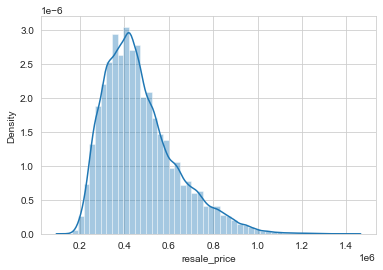

/Users/xinyitay/Prodicty/price-prediction/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


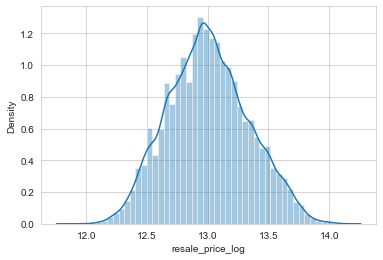

In [15]:
sns.set_style('whitegrid')
sns.distplot(df.resale_price)
plt.show()

df['resale_price_log'] = np.log(df.resale_price)
sns.distplot(df.resale_price_log)
plt.show()

<AxesSubplot:>

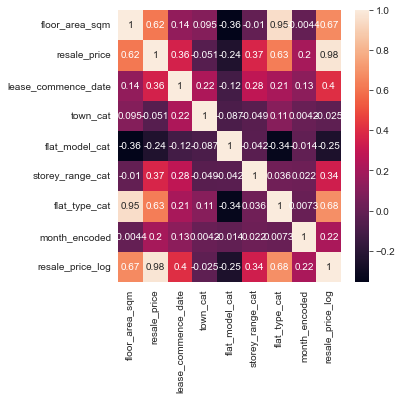

In [16]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
X = df[['month_encoded','flat_type_cat','flat_model_cat','floor_area_sqm','lease_commence_date','storey_range_cat','town_cat']]
y = df.resale_price
# y_train = df.resale_price_log

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

lin_preds = linreg.predict(X_test)
rmse = mean_squared_error(y_test, lin_preds) ** 0.5
acc = r2_score(y_test, lin_preds)
print("RMSE: ", rmse)
print("R2: ", acc)

RMSE:  102265.00821440722
R2:  0.6044624768200093


In [19]:
from joblib import dump

# dump the pipeline model
dump(linreg, filename="model.pkl")


['model.pkl']

In [20]:
X_test


,month_encoded,flat_type_cat,flat_model_cat,floor_area_sqm,lease_commence_date,storey_range_cat,town_cat
68715,40,2,12,68.0,1980,3,1
120211,61,4,17,117.0,1975,8,15
45646,26,3,8,92.0,2014,2,17
24263,14,4,4,114.0,2012,6,23
16400,9,5,7,142.0,1999,1,20
...,...,...,...,...,...,...,...
92991,50,3,8,104.0,1985,0,3
111835,57,5,3,147.0,1995,1,22
101848,53,3,4,92.0,2013,2,25
33344,19,4,5,119.0,1979,6,8


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [22]:
rf = RandomForestRegressor(n_estimators=500, random_state=100)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)
acc = r2_score(y_test, preds)
print(acc)
dump(rf, filename="rf.pkl")


0.9533435689047912


['rf.pkl']

In [23]:
svr = SVR()
svr.fit(X_train, y_train)

svr_preds = svr.predict(X_test)
acc = r2_score(y_test, svr_preds)
print(acc)
dump(svr, filename="svr.pkl")


-0.03207664718311021


['svr.pkl']

In [24]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)
acc = r2_score(y_test, knn_preds)
print(acc)
dump(knn, filename="knn.pkl")

0.8416801513698405


['knn.pkl']